## CAschool

Trabalho: Desempenho de leitura nas escolas da CA

Objetivo da pesquisa: nesta tarefa, pretendemos analisar o efeito de diferentes fatores no desempenho de leitura em escolas da Califórnia. Especificamente, vamos nos concentrar no investimento em educação e no ambiente socioeconômico dos alunos.
Sua análise deve incluir as seguintes etapas:

1. Unboxing do conjunto de dados: Execute a verificação preliminar usual do conjunto de dados.
2. Análise mais detalhada e configuração da variável principal (ou seja, desempenho de leitura): Analise a distribuição de frequência da variável.
3. Renda: A renda da família costuma ter uma influência no desempenho dos alunos em geral. Você pode verificar visualmente se este é o caso aqui? Descreva e comente qualquer padrão possível que você identifique.
4. Despesas: Intuitivamente, esperamos que o investimento em educação afete o desempenho dos alunos. Então:
a. Repita a análise anterior com a variável ‘despesas’. Descreva qualquer padrão que você possa identificar.
b. Vamos nos aprofundar neste assunto. Um maior investimento em educação pode ser investido na contratação de professores. Então:
i. Adicione uma coluna à contabilização do conjunto de dados para a razão num. alunos / núm. professores
ii. Analise se a contratação de professores é um bom investimento para melhorar o desempenho de leitura.
5. Aprendizagem de inglês: Ser ou não um falante nativo de inglês pode fazer a diferença em nosso estudo de caso. Repita a análise anterior com a variável ‘inglês’. Descreva qualquer padrão que você possa identificar.
6. Correlações:
uma. Calcule, separadamente, a correlação entre desempenho em leitura e renda familiar de um lado e o aprendizado de inglês do outro. Escolha o teste com cuidado!
b. De acordo com os resultados da correlação. Que par de variáveis está mais relacionado?


In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

1. Unboxing do conjunto de dados: Execute a verificação preliminar usual do conjunto de dados.

In [2]:
# Importando banco de dados e criando a variável 'dataset'
dataset = pd.read_csv('CAschools_reading.csv', sep=';')

In [3]:
# Visualizando o dataset
dataset.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988


In [4]:
# Eliminando a coluna 'Unnamed: 0'
dataset = dataset.drop(columns=['Unnamed: 0'])
dataset.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988


In [5]:
# Verificando o tamanho do dataset
# 420 linhas e 13 colunas
dataset.shape

(420, 13)

In [6]:
# Verificando o tipo do dataset
# O dataset é um DataFrame
type(dataset)

pandas.core.frame.DataFrame

In [7]:
# Resumo estatístico do dataset
dataset.describe().round(2)

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read
count,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00
mean,67472.81,2628.79,129.07,13.25,44.71,303.38,5312.41,15.32,15.77,654.97
std,3466.99,3913.10,187.91,11.45,27.12,441.34,633.94,7.23,18.29,20.11
min,61382.00,81.00,4.85,0.00,0.00,0.00,3926.07,5.34,0.00,604.50
25%,64307.75,379.00,19.66,4.40,23.28,46.00,4906.18,10.64,1.94,640.40
50%,67760.50,950.50,48.56,10.52,41.75,117.50,5214.52,13.73,8.78,655.75
75%,70419.00,3008.00,146.35,18.98,66.86,375.25,5601.40,17.63,22.97,668.73
max,75440.00,27176.00,1429.00,78.99,100.00,3324.00,7711.51,55.33,85.54,704.00


In [8]:
# Checando o tipo de dado por coluna e verificando se existem dados nulos (NaN)
# Não existem dados nulos pois todas as colunas apresentam 420 registros 'non-null'
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   district     420 non-null    int64  
 1   school       420 non-null    object 
 2   county       420 non-null    object 
 3   grades       420 non-null    object 
 4   students     420 non-null    int64  
 5   teachers     420 non-null    float64
 6   calworks     420 non-null    float64
 7   lunch        420 non-null    float64
 8   computer     420 non-null    int64  
 9   expenditure  420 non-null    float64
 10  income       420 non-null    float64
 11  english      420 non-null    float64
 12  read         420 non-null    float64
dtypes: float64(7), int64(3), object(3)
memory usage: 42.8+ KB


2. Análise mais detalhada e configuração da variável principal (ou seja, desempenho de leitura): Analise a distribuição de frequência da variável.

In [9]:
# Resumo estatístico da variável 'read'
dataset.read.describe()

count    420.000000
mean     654.970477
std       20.107980
min      604.500000
25%      640.400024
50%      655.750000
75%      668.725006
max      704.000000
Name: read, dtype: float64

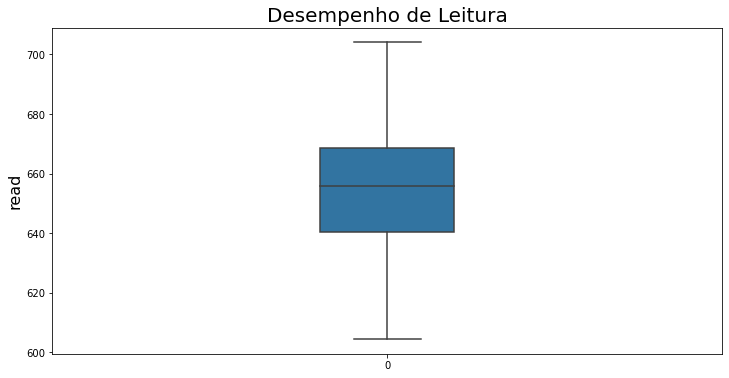

In [10]:
# Gerando um boxplot da variavel 'read'
# Como podemos ver no gráfico, não encontramos outliers e a distribuição dos quartis é bem equilibrada
ax = sns.boxplot(data=dataset['read'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Desempenho de Leitura', fontsize=20)
ax.set_ylabel('read', fontsize=16)
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000176A6A24910>]],
      dtype=object)

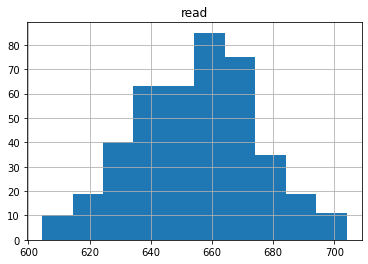

In [11]:
# Montando histograma da variavel 'read' 
dataset.hist(['read'], bins = 10)

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [12]:
# Montando uma matriz de correlação para avaliar a relação da variável 'read' com as demais variáveis
dataset.corr().round(4)

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read
district,1.0000,-0.0336,-0.0315,-0.1617,-0.1080,-0.0210,0.0492,0.1039,-0.0270,0.1066
students,-0.0336,1.0000,0.9971,0.0902,0.1292,0.9289,-0.1123,0.0284,0.3549,-0.1884
teachers,-0.0315,0.9971,1.0000,0.0926,0.1243,0.9372,-0.0952,0.0430,0.3514,-0.1791
calworks,-0.1617,0.0902,0.0926,1.0000,0.7394,0.0592,0.0679,-0.5127,0.3196,-0.6118
lunch,-0.1080,0.1292,0.1243,0.7394,1.0000,0.0614,-0.0610,-0.6844,0.6531,-0.8788
computer,-0.0210,0.9289,0.9372,0.0592,0.0614,1.0000,-0.0713,0.0943,0.2913,-0.1090
expenditure,0.0492,-0.1123,-0.0952,0.0679,-0.0610,-0.0713,1.0000,0.3145,-0.0714,0.2179
income,0.1039,0.0284,0.0430,-0.5127,-0.6844,0.0943,0.3145,1.0000,-0.3074,0.6978
english,-0.0270,0.3549,0.3514,0.3196,0.6531,0.2913,-0.0714,-0.3074,1.0000,-0.6903
read,0.1066,-0.1884,-0.1791,-0.6118,-0.8788,-0.1090,0.2179,0.6978,-0.6903,1.0000


## Distribuição de frequências da variável *principal* (read)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


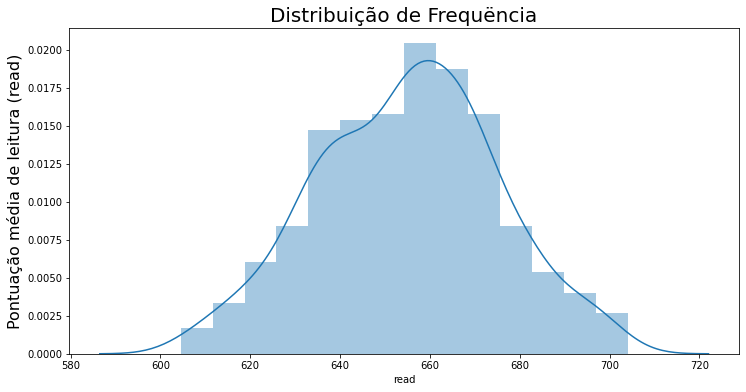

In [13]:
ax = sns.distplot(dataset['read'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequëncia', fontsize=20)
ax.set_ylabel('Pontuação média de leitura (read)', fontsize=16)
ax

3. Renda (income): A renda da família costuma ter uma influência no desempenho dos alunos em geral. Você pode verificar visualmente se este é o caso aqui? Descreva e comente qualquer padrão possível que você identifique

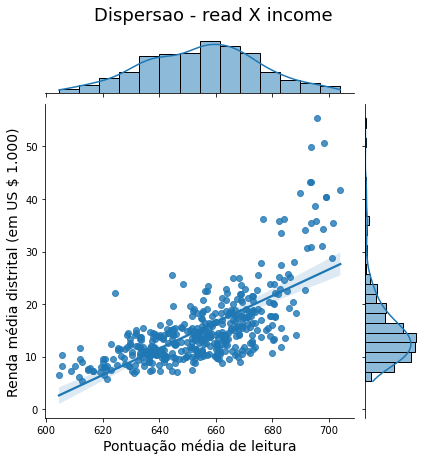

In [14]:
# Joinplot cruzando read X income
ax = sns.jointplot(x="read", y="income", data=dataset, kind = 'reg')
ax.fig.suptitle('Dispersao - read X income', fontsize=18, y=1.05)
ax.set_axis_labels("Pontuação média de leitura", "Renda média distrital (em US $ 1.000)", fontsize=14)
ax

** Pelo gráfico de dispersão acima, vemos que há uma relação positiva e forte entre a Renda (income) e a Pontuação Média de Leitura (read), ou seja, a medida que aumenta a renda, aumenta a pontuação.

4. Despesas: Intuitivamente, esperamos que o investimento em educação afete o desempenho dos alunos. Então:
a. Repita a análise anterior com a variável ‘despesas’. Descreva qualquer padrão que você possa identificar.
b. Vamos nos aprofundar neste assunto. Um maior investimento em educação pode ser investido na contratação de professores. Então:
i. Adicione uma coluna à contabilização do conjunto de dados para a razão num. alunos / núm. professores
ii. Analise se a contratação de professores é um bom investimento para melhorar o desempenho de leitura.

** a. Repita a análise anterior com a variável ‘despesas’. Descreva qualquer padrão que você possa identificar.

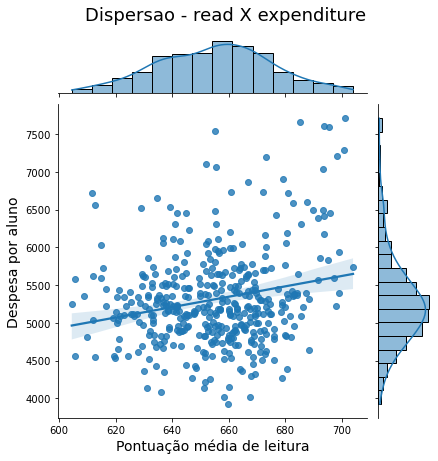

In [15]:
# Joinplot cruzando read X expenditure
ax = sns.jointplot(x="read", y="expenditure", data=dataset, kind = 'reg')
ax.fig.suptitle('Dispersao - read X expenditure', fontsize=18, y=1.05)
ax.set_axis_labels("Pontuação média de leitura", "Despesa por aluno", fontsize=14)
ax

** Pelo gráfico de dispersão acima, vemos que há uma relação positiva e fraca entre a Despesa por Aluno (expenditure) e a Pontuação Média de Leitura (read), ou seja, há uma baixa relação entre essas duas variáveis.

b. Vamos nos aprofundar neste assunto. Um maior investimento em educação pode ser investido na contratação de professores. Então:
i. Adicione uma coluna à contabilização do conjunto de dados para a razão num. alunos / núm. professores

In [16]:
dataset['studentsPerteachers'] = dataset['students'] / dataset['teachers']

In [17]:
dataset.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,studentsPerteachers
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,17.889909
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,21.524664
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,18.697225
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,17.357143
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,18.671329


In [18]:
dataset.describe().round(2)

,district,students,teachers,calworks,lunch,computer,expenditure,income,english,read,studentsPerteachers
count,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00,420.00
mean,67472.81,2628.79,129.07,13.25,44.71,303.38,5312.41,15.32,15.77,654.97,19.64
std,3466.99,3913.10,187.91,11.45,27.12,441.34,633.94,7.23,18.29,20.11,1.89
min,61382.00,81.00,4.85,0.00,0.00,0.00,3926.07,5.34,0.00,604.50,14.00
25%,64307.75,379.00,19.66,4.40,23.28,46.00,4906.18,10.64,1.94,640.40,18.58
50%,67760.50,950.50,48.56,10.52,41.75,117.50,5214.52,13.73,8.78,655.75,19.72
75%,70419.00,3008.00,146.35,18.98,66.86,375.25,5601.40,17.63,22.97,668.73,20.87
max,75440.00,27176.00,1429.00,78.99,100.00,3324.00,7711.51,55.33,85.54,704.00,25.80


ii. Analise se a contratação de professores é um bom investimento para melhorar o desempenho de leitura.

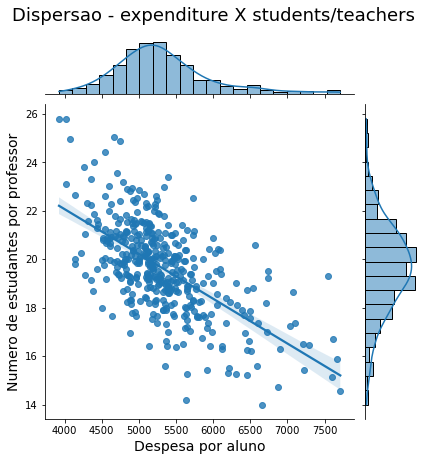

In [19]:
# Joinplot cruzando studentsPerteachers X expenditure
ax = sns.jointplot(x="expenditure", y="studentsPerteachers", data=dataset, kind = 'reg')
ax.fig.suptitle('Dispersao - expenditure X students/teachers', fontsize=18, y=1.05)
ax.set_axis_labels("Despesa por aluno", "Numero de estudantes por professor", fontsize=14)
ax

** Pelo gráfico de dispersão acima, vemos que há uma relação negativa e forte entre a Numero de Alunos por Professor (students/teachers) e a Despesa por aluno (expenditure), ou seja, a medida que aumenta o numero de alunos por professor, diminui a despesa por aluno.

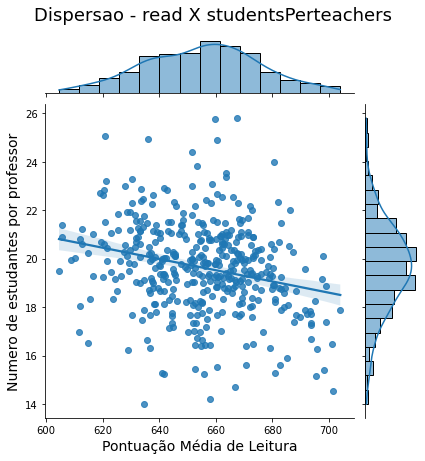

In [20]:
# Joinplot cruzando read X studentsPerteachers
ax = sns.jointplot(x="read", y="studentsPerteachers", data=dataset, kind = 'reg')
ax.fig.suptitle('Dispersao - read X studentsPerteachers', fontsize=18, y=1.05)
ax.set_axis_labels("Pontuação Média de Leitura", "Numero de estudantes por professor", fontsize=14)
ax

** Pelo gráfico de dispersão acima, vemos que há uma relação negativa e fraca entre a Numero de Estudantes por Professor (students/teachers) e a Pontuação Média de Leitura (read), ou seja, há uma baixa relação entre essas duas variáveis.

** Concluo, então, que a contratação de professores trará poucos resultados na Pontuação Média de Leitura dos Alunos, mas impactará fortemente nas despesas das escolas. Por isso, não se deve contratar novos professores

5. Aprendizagem de inglês: Ser ou não um falante nativo de inglês pode fazer a diferença em nosso estudo de caso. Repita a análise anterior com a variável ‘inglês’. Descreva qualquer padrão que você possa identificar.

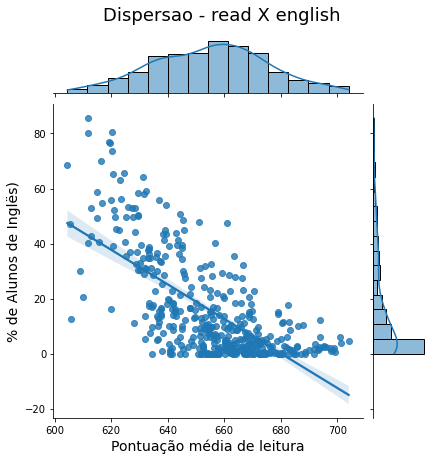

In [21]:
# Joinplot cruzando read X english
# Alunos de inglês NÃO são nativos e tem o inglês como segunda lingua
ax = sns.jointplot(x="read", y="english", data=dataset, kind = 'reg')
ax.fig.suptitle('Dispersao - read X english', fontsize=18, y=1.05)
ax.set_axis_labels("Pontuação média de leitura", "% de Alunos de Inglës)", fontsize=14)
ax

** Pelo gráfico de dispersão acima, vemos que há uma relação negativa e forte entre a Pontuação Média de Leitura (read) e a % de Alunos de inglês (english), ou seja, a medida que aumenta o numero de alunos de inglês (Não nativos), diminui a Pontuação Média por Aluno.

6. Correlações:
a. Calcule, separadamente, a correlação entre desempenho em leitura e renda familiar de um lado e o aprendizado de inglês do outro. Escolha o teste com cuidado!
b. De acordo com os resultados da correlação. Que par de variáveis está mais relacionado?

In [22]:
# Calculando a correlação entre o desempenho de leitura (read) X a renda familiar (income)
# Usarei a função '.corr' 
dataset['read'].corr(dataset['income'])

0.6978188529047875

In [23]:
# Calculando a correlação entre o desempenho de leitura (read) X o % de alunos de inglês (english)
dataset['read'].corr(dataset['english'])

-0.6902858651795093

** Apesar de uma correlação ser positiva e outra negativa, vemos que os indices de correlação são praticamente iguais, o que indica que os dois pares de variáveis são quase que igualmente relacionados. Vemos uma leve vantagem para o relação entre as variáveis 'read' e 'income', porém muito pequena.

1) Formulação do modelo de linha de base: formular um modelo econométrico que
explica a pontuação média de leitura no distrito escolar em função do
seguintes características escolares e demográficas: proporção aluno-professor,
porcentagem de alunos qualificados para almoço a preço reduzido e porcentagem de
Aprendizes de inglês.

In [24]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

In [25]:
## Criando uma Series (pandas) para armazenar a Pontuação média de leitura (y)
y = dataset['read']

In [26]:
## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)
X = dataset[['studentsPerteachers', 'lunch', 'english']]

In [27]:
## Criando os datasets de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [28]:
## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*
X_train.shape

(294, 3)

In [29]:
X_test.shape

(126, 3)

In [30]:
# Importando bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
## Instanciando a classe *LinearRegression()*
modelo = LinearRegression()

In [32]:
## Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO,
## (y_train e X_train)
modelo.fit(X_train, y_train)

LinearRegression()

In [33]:
## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.78


In [34]:
## Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"
y_previsto = modelo.predict(X_test)

In [35]:
## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.85


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

In [36]:
# Selecionando 1 registro do X_test
entrada = X_test[0:1]
entrada

,studentsPerteachers,lunch,english
157,21.391304,43.902401,16.666668


In [37]:
# Gerando a previsão da variável dependente para o registro selecionado.
# O modelo irá calcular a variável 'read' para os dados acima
modelo.predict(entrada)[0]

652.9982220960195

In [38]:
# Montando as próprias variáveis explicativas e fazendo a previsão da variável principal (read)

studentsPerteachers = 19.72
lunch = 41.75
english = 8.78

entrada=[[studentsPerteachers, lunch, english]]

print('read = {0:.2f}'.format(modelo.predict(entrada)[0]))

read = 657.67


# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [39]:
y_previsto_train = modelo.predict(X_train)

y_previsto_train = modelo.predict(X_train)## Gráfico de dispersão entre valor estimado e valor real

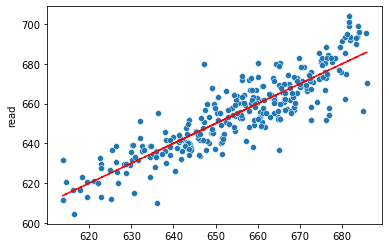

In [40]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
z = np.polyfit(y_previsto_train, y_train, 1)
p = np.poly1d(z)
plt.plot(y_previsto_train,p(y_previsto_train),"r--")

** Quanto mais próximos os pontos da reta (vermelha), melhor o Modelo de Previsão e menor o Resíduo (erro) da previsão

2) Estimativa: estimativa por OLS do modelo especificado. Crie uma tabela que relata o
Resultados principais.
3) Interpretação: forneça uma interpretação do sinal e magnitude do OLS
estimativas. A proporção aluno-professor exibe o sinal esperado? Discutir
a bondade do ajuste.
4) Inferência: formular as hipóteses de significância individual e conjunta
testes. Discuta os resultados desses testes.
5) Expandindo o modelo: estimar um modelo expandido que adiciona a receita do distrito
e despesas por aluno de acordo com a especificação da linha de base.
a) Crie uma tabela que mostra os resultados da estimativa tanto da linha de base quanto
o modelo expandido.
b) Explique os resultados da estimativa expandida. Discuta também as diferenças
no coeficiente da proporção aluno-professor e sua significância em
especificações.
c) Crie uma nova variável, número de computadores por aluno, e adicione-o ao
modelo expandido. Mostre os resultados OLS desta estimativa em uma nova tabela
que também inclui os resultados de estimativas anteriores. Discuta as descobertas.

# <font color='green' style='font-size: 30px;'>EXTRAS</font>
<hr style='border: 2px solid green;'>

## Verificar graficamente a correlação entre a Pontuação Média de Leitura (read) e a % qualificada para almoço a preço reduzido (lunch).

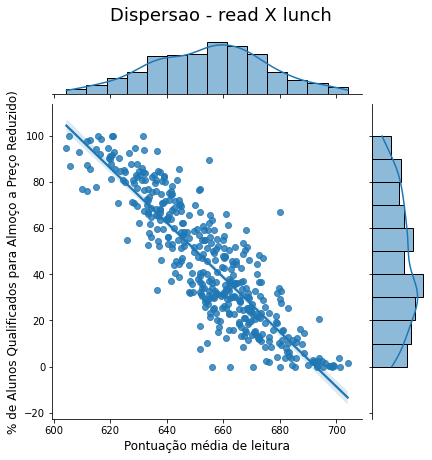

In [41]:
# Joinplot cruzando read X lunch
ax = sns.jointplot(x="read", y="lunch", data=dataset, kind = 'reg')
ax.fig.suptitle('Dispersao - read X lunch', fontsize=18, y=1.05)
ax.set_axis_labels("Pontuação média de leitura", "% de Alunos Qualificados para Almoço a Preço Reduzido)", fontsize=12)
ax

** Concluo graficamente que existe uma correlação forte e negativa entre as duas variáveis. A medida que diminue a % de alunos qualificados para ter preço reduzido do almoço, aumenta a Pontuação média de leitura. Isso, confirma a correlação positiva entre as variáveis 'read' e ''income'.

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para a variável 'read'</font>
<hr style='border: 2px solid red;'>

In [42]:
# Importando biblioteca
from sklearn.model_selection import train_test_split

In [43]:
## Criando uma Series (pandas) para armazenar a Pontuação média de leitura (y)
y = dataset['read']

In [44]:
## Vou escolher 3 variáveis explicativas que tem maior correlação com a variável principal (read)
## São elas: 'english', 'income', 'lunch'

In [45]:
## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)
X = dataset[['english', 'income', 'lunch']]

In [46]:
## Criando os datasets de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [47]:
## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*
X_train.shape

(294, 3)

In [48]:
X_test.shape

(126, 3)

In [49]:
# Confirmando o total de registros do nosso dataset
X_train.shape[0] + X_test.shape [0]

420

In [50]:
# Importando bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [51]:
## Instanciando a classe *LinearRegression()*
modelo = LinearRegression()

In [52]:
## Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO,
## (y_train e X_train)
modelo.fit(X_train, y_train)

LinearRegression()

In [53]:
## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.81


In [54]:
## Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"
y_previsto = modelo.predict(X_test)

In [55]:
## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.85


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [56]:
# Selecionando 1 registro do X_test
entrada = X_test[0:1]
entrada

,english,income,lunch
157,16.666668,11.081,43.902401


In [57]:
# Gerando a previsão da variável dependente para o registro selecionado.
# english = 16.666668
# income = 11.081
# lunch = 43.902401
# O modelo irá calcular a variável 'read' para os dados acima
modelo.predict(entrada)[0]

651.5942891327846

## Criando um simulador simples

In [58]:
# Montando as próprias variáveis explicativas e fazendo a previsão da variável principal (read)
english=8.78
income=13.73
lunch=41.75
entrada=[[english, income, lunch]]

print('read = {0:.2f}'.format(modelo.predict(entrada)[0]))

read = 656.82


# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [59]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

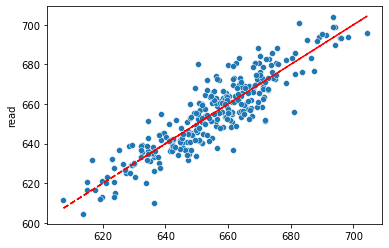

In [60]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
z = np.polyfit(y_previsto_train, y_train, 1)
p = np.poly1d(z)
plt.plot(y_previsto_train,p(y_previsto_train),"r--")

** Quanto mais próximos os pontos da reta (vermelha), melhor o Modelo de Previsão e menor o Resíduo (erro) da previsão

## Obtendo os resíduos

In [61]:
residuo = y_train - y_previsto_train
residuo

251     4.469818
60      0.059542
160    -0.995233
177     1.141032
69     11.714861
         ...    
73      0.891462
68     14.900782
215     8.875147
341     5.842228
84      0.342428
Name: read, Length: 294, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

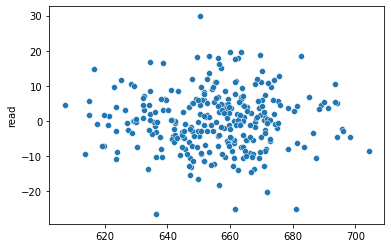

In [62]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo)

** A distribuição aleatória dos resíduos mostra a melhor quallidade do modelo de previsão

## Utilizando os resíduos ao quadrado

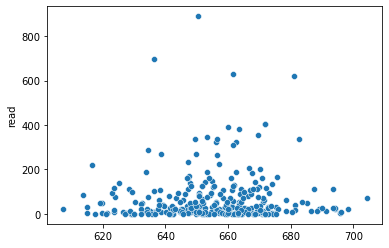

In [63]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2)

## Plotando a distribuição de frequências dos resíduos

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


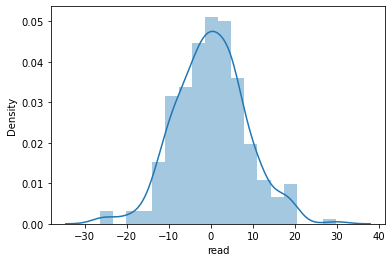

In [64]:
ax = sns.distplot(residuo)

** Quando a distribuição de frequências dos resíduos se aproximam de uma distribuição normal, melhor é o modelo de previsão
** Neste caso, o gráfico mostra uma distribuição bem parecida com uma 'curva normal'